In [69]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
from skimage.transform import resize
from tensorflow import keras
import os

%matplotlib inline

In [76]:
classes = ['airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Imagenes de prueba: 10


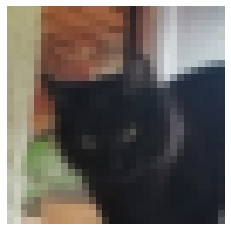

In [163]:
images = []
images_res = []

for img in os.listdir('img'):
    path = os.path.join('img', img)
    curr_img = image.imread(path)
    images.append(curr_img)
    images_res.append(resize(curr_img, (32, 32), anti_aliasing=1))


print('Imagenes de prueba:', len(images))
plt.imshow(images_res[3])
plt.axis('off');

In [164]:
#Armo el dataset

X_test = np.stack(images_res, axis=0)
print(X_test.shape)

(10, 32, 32, 3)


In [70]:
#Cargo el modelo ya entrenado
model_path = os.path.join('models', 'AlexNet.h5')

model = keras.models.load_model(model_path)

In [100]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [179]:
preds = np.argsort(model.predict(X_test), axis=0)[::-1][:1]


1/1 [==============================] - 0s 218ms/step


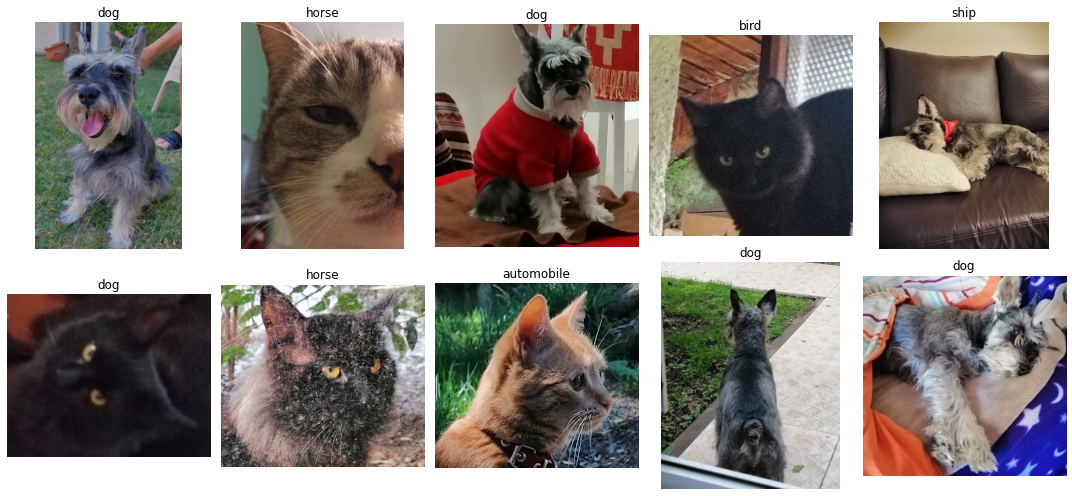

In [180]:
fig = plt.figure(figsize=(15,7))

for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(classes[preds[0, i]])
    plt.tight_layout()